In [1]:
from pathlib import Path

def count_csv_rows(file_path, has_header=True):
    """
    Counts the number of rows in a CSV file.
    
    Parameters:
    - file_path (Path): The path to the CSV file.
    - has_header (bool): Whether the CSV file has a header row.
    
    Returns:
    - int: The number of data rows in the CSV file.
    """
    with file_path.open('r', encoding='utf-8') as file:
        row_count = sum(1 for _ in file)
    return row_count - 1 if has_header else row_count

def enumerate_and_sort_csv(datadir, has_header=True):
    """
    Enumerates CSV files in the given directory, counts their rows, and sorts them.
    
    Parameters:
    - datadir (str or Path): The directory containing CSV files.
    - has_header (bool): Whether the CSV files have header rows.
    
    Returns:
    - List of tuples: Each tuple contains (file_name, row_count), sorted by row_count ascending.
    """
    datadir = Path(datadir)
    if not datadir.is_dir():
        raise ValueError(f"The path {datadir} is not a valid directory.")
    
    # Find all CSV files in the directory
    csv_files = list(datadir.glob('*.csv'))
    
    if not csv_files:
        print("No CSV files found in the specified directory.")
        return []
    
    file_row_counts = []
    
    for file in csv_files:
        try:
            rows = count_csv_rows(file, has_header=has_header)
            file_row_counts.append((file.name, rows))
        except Exception as e:
            print(f"Error processing {file.name}: {e}")
    
    # Sort the list of tuples based on row_count (ascending order)
    sorted_files = sorted(file_row_counts, key=lambda x: x[1])
    
    return sorted_files




In [2]:
# Specify the directory containing CSV files
data_directory = 'data/prices'  # Replace with your directory path

# Enumerate and sort CSV files
sorted_csv_files = enumerate_and_sort_csv(data_directory, has_header=True)

if sorted_csv_files:
    print("\nCSV files sorted by number of rows (ascending):")
    for filename, count in sorted_csv_files:
        print(f"{filename}: {count} rows")


CSV files sorted by number of rows (ascending):
INVH.csv: 2196 rows
COWZ.csv: 2222 rows
LW.csv: 2251 rows
HWM.csv: 2258 rows
CTEC.L.csv: 2272 rows
TTD.csv: 2287 rows
FTV.csv: 2342 rows
TEAM.csv: 2484 rows
HPE.csv: 2520 rows
SINCH.ST.csv: 2528 rows
1COV.DE.csv: 2558 rows
VTEB.csv: 2558 rows
KHC.csv: 2594 rows
PYPL.csv: 2594 rows
SHOP.csv: 2625 rows
ETSY.csv: 2649 rows
EVO.ST.csv: 2667 rows
AUTO.L.csv: 2679 rows
QRVO.csv: 2720 rows
KEYS.csv: 2771 rows
CFG.csv: 2789 rows
CZR.csv: 2791 rows
ZAL.DE.csv: 2812 rows
SYF.csv: 2827 rows
IUSB.csv: 2861 rows
DGRO.csv: 2861 rows
ANET.csv: 2865 rows
BME.L.csv: 2874 rows
PAYC.csv: 2901 rows
WLN.PA.csv: 2902 rows
HLT.csv: 2985 rows
ALLE.csv: 3002 rows
QUAL.csv: 3088 rows
CDW.csv: 3102 rows
NWSA.csv: 3108 rows
NWS.csv: 3108 rows
BNDX.csv: 3119 rows
VNA.DE.csv: 3122 rows
IQV.csv: 3136 rows
CCH.L.csv: 3158 rows
ZTS.csv: 3203 rows
NCLH.csv: 3212 rows
ABBV.csv: 3224 rows
IXUS.csv: 3269 rows
IEMG.csv: 3269 rows
IEFA.csv: 3269 rows
FANG.csv: 3277 rows
WDAY.

In [3]:
# find out the stock IDs which has at least 15000 rows of data
stock_ids = [filename[:-4] for filename, count in sorted_csv_files if count > 15999]

print("\nStock IDs with at least 15000 rows of data:")
for stock_id in stock_ids:
    print(stock_id)



Stock IDs with at least 15000 rows of data:
LMT
PG
ED
IBM
IP
JNJ
CNP
XOM
CVX
GD
MRK
HPQ
GE
MO
MSI
HON
AEP
MMM
DTE
DIS
KO
CAT
KR
BA


In [4]:
len(stock_ids)

24

In [5]:
# make one single pandas dataframe contains the data from above stock IDs, the index is the data, the columns are the stock IDs
import pandas as pd
dataframes = []
for stock_id in stock_ids:
    file_path = Path(data_directory) / f"{stock_id}.csv"
    df = pd.read_csv(file_path, usecols=['Date', 'Adj Close'], parse_dates=['Date'])
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': stock_id}, inplace=True)
    dataframes.append(df)

combined_df = pd.concat(dataframes, axis=1)


In [6]:
combined_df

,LMT,PG,ED,IBM,IP,JNJ,CNP,XOM,CVX,GD,...,MSI,HON,AEP,MMM,DTE,DIS,KO,CAT,KR,BA
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,0.847133,0.249784,0.244722,1.471740,0.848781,0.061047,0.287279,0.090127,0.314456,0.169642,...,0.617149,1.040953,0.908272,0.559828,0.393137,0.057441,0.045368,0.464297,0.032189,0.190931
1962-01-03,0.851761,0.247054,0.244722,1.484606,0.837194,0.060098,0.284472,0.091465,0.313746,0.175320,...,0.615354,1.052677,0.906616,0.564037,0.389902,0.058212,0.044358,0.468819,0.032866,0.194750
1962-01-04,0.835559,0.242959,0.243967,1.469810,0.834297,0.059466,0.284472,0.091688,0.310907,0.176030,...,0.609973,1.059709,0.893381,0.564037,0.386666,0.058212,0.044695,0.480879,0.032730,0.192840
1962-01-05,0.828616,0.241253,0.238680,1.440865,0.842987,0.058517,0.277609,0.089681,0.303098,0.176739,...,0.606385,1.057366,0.873528,0.549304,0.378577,0.058405,0.043684,0.485401,0.031919,0.189022
1962-01-08,0.817043,0.234770,0.239813,1.413848,0.825606,0.057568,0.274490,0.089457,0.301679,0.179579,...,0.595621,1.062055,0.866911,0.546147,0.379386,0.058212,0.043235,0.488416,0.031784,0.189499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-20,505.899994,151.960007,101.720001,283.649994,47.889999,193.720001,40.220001,112.699997,154.479996,337.190002,...,448.440002,206.029999,117.820000,154.779999,143.320007,111.959999,68.440002,531.179993,69.150002,216.820007
2025-10-21,489.500000,151.619995,101.559998,282.049988,47.680000,191.880005,40.029999,112.709999,153.789993,340.690002,...,448.100006,209.080002,117.430000,166.639999,142.270004,114.300003,71.220001,524.650024,67.599998,217.259995
2025-10-22,487.140015,152.199997,101.940002,287.510010,47.950001,192.940002,40.049999,114.709999,155.570007,338.239990,...,446.859985,206.610001,117.269997,167.229996,142.690002,113.080002,70.809998,513.909973,68.599998,216.589996


In [7]:
# now imputate missing data, first make forwarding fill, then backward fill, to make sure there is no NaN in the table
combined_df.fillna(method='ffill', inplace=True)
combined_df.fillna(method='bfill', inplace=True)
combined_df

/tmp/ipykernel_1407564/3205725967.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)
/tmp/ipykernel_1407564/3205725967.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='bfill', inplace=True)


,LMT,PG,ED,IBM,IP,JNJ,CNP,XOM,CVX,GD,...,MSI,HON,AEP,MMM,DTE,DIS,KO,CAT,KR,BA
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,0.847133,0.249784,0.244722,1.471740,0.848781,0.061047,0.287279,0.090127,0.314456,0.169642,...,0.617149,1.040953,0.908272,0.559828,0.393137,0.057441,0.045368,0.464297,0.032189,0.190931
1962-01-03,0.851761,0.247054,0.244722,1.484606,0.837194,0.060098,0.284472,0.091465,0.313746,0.175320,...,0.615354,1.052677,0.906616,0.564037,0.389902,0.058212,0.044358,0.468819,0.032866,0.194750
1962-01-04,0.835559,0.242959,0.243967,1.469810,0.834297,0.059466,0.284472,0.091688,0.310907,0.176030,...,0.609973,1.059709,0.893381,0.564037,0.386666,0.058212,0.044695,0.480879,0.032730,0.192840
1962-01-05,0.828616,0.241253,0.238680,1.440865,0.842987,0.058517,0.277609,0.089681,0.303098,0.176739,...,0.606385,1.057366,0.873528,0.549304,0.378577,0.058405,0.043684,0.485401,0.031919,0.189022
1962-01-08,0.817043,0.234770,0.239813,1.413848,0.825606,0.057568,0.274490,0.089457,0.301679,0.179579,...,0.595621,1.062055,0.866911,0.546147,0.379386,0.058212,0.043235,0.488416,0.031784,0.189499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-20,505.899994,151.960007,101.720001,283.649994,47.889999,193.720001,40.220001,112.699997,154.479996,337.190002,...,448.440002,206.029999,117.820000,154.779999,143.320007,111.959999,68.440002,531.179993,69.150002,216.820007
2025-10-21,489.500000,151.619995,101.559998,282.049988,47.680000,191.880005,40.029999,112.709999,153.789993,340.690002,...,448.100006,209.080002,117.430000,166.639999,142.270004,114.300003,71.220001,524.650024,67.599998,217.259995
2025-10-22,487.140015,152.199997,101.940002,287.510010,47.950001,192.940002,40.049999,114.709999,155.570007,338.239990,...,446.859985,206.610001,117.269997,167.229996,142.690002,113.080002,70.809998,513.909973,68.599998,216.589996


In [8]:
# make log returns instead of prices for above dataframe
import numpy as np
log_returns_df = np.log(combined_df / combined_df.shift(1))
log_returns_df = log_returns_df.dropna()  # Drop the first row with NaN
log_returns_df

,LMT,PG,ED,IBM,IP,JNJ,CNP,XOM,CVX,GD,...,MSI,HON,AEP,MMM,DTE,DIS,KO,CAT,KR,BA
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-03,0.005449,-0.010990,0.000000,0.008703,-0.013746,-0.015670,-0.009819,0.014741,-0.002261,0.032925,...,-0.002913,0.011199,-0.001825,0.007491,-0.008264,0.013333,-0.022532,0.009693,0.020790,0.019803
1962-01-04,-0.019205,-0.016714,-0.003091,-0.010016,-0.003466,-0.010578,0.000000,0.002436,-0.009090,0.004041,...,-0.008784,0.006659,-0.014706,0.000000,-0.008333,0.000000,0.007570,0.025398,-0.004123,-0.009852
1962-01-05,-0.008344,-0.007047,-0.021910,-0.019889,0.010363,-0.016090,-0.024419,-0.022140,-0.025435,0.004024,...,-0.005900,-0.002214,-0.022473,-0.026468,-0.021143,0.003308,-0.022876,0.009360,-0.025106,-0.020000
1962-01-08,-0.014066,-0.027242,0.004736,-0.018928,-0.020834,-0.016348,-0.011300,-0.002492,-0.004695,0.015936,...,-0.017910,0.004425,-0.007605,-0.005763,0.002135,-0.003308,-0.010335,0.006192,-0.004246,0.002521
1962-01-09,0.008463,-0.001455,-0.001577,0.011759,-0.014135,0.010929,0.000000,-0.002496,0.014019,0.003945,...,-0.024393,-0.002211,-0.007663,0.000000,0.002130,0.019676,0.018017,0.009217,-0.021507,0.002516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-20,0.021478,0.003692,0.005224,0.008390,0.027735,0.002584,0.014526,0.004090,0.009104,0.018075,...,0.007701,0.015013,0.002464,0.013923,0.009605,0.011589,0.000000,0.010618,0.002317,0.018057
2025-10-21,-0.032955,-0.002240,-0.001574,-0.005657,-0.004395,-0.009544,-0.004735,0.000089,-0.004477,0.010326,...,-0.000758,0.014695,-0.003316,0.073831,-0.007353,0.020685,0.039816,-0.012370,-0.022670,0.002027
2025-10-22,-0.004833,0.003818,0.003735,0.019173,0.005647,0.005509,0.000500,0.017589,0.011508,-0.007217,...,-0.002771,-0.011884,-0.001363,0.003534,0.002948,-0.010731,-0.005773,-0.020683,0.014685,-0.003089


In [9]:
log_returns_df.max()

LMT    0.237130
PG     0.200486
ED     0.165631
IBM    0.123665
IP     0.197896
JNJ    0.147514
CNP    0.488353
XOM    0.164755
CVX    0.204903
GD     0.182321
MRK    0.122509
HPQ    0.159465
GE     0.179845
MO     0.151650
MSI    0.226737
HON    0.271718
AEP    0.181001
MMM    0.206938
DTE    0.145182
DIS    0.174756
KO     0.179586
CAT    0.137350
KR     0.260415
BA     0.217677
dtype: float64

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Parameters
historical_days = 512  
# Assume log_returns_df is your DataFrame and stock_ids is the list of stock columns
# For example:
# log_returns_df = pd.read_csv('log_returns.csv')
# stock_ids = ['stock_1', 'stock_2', ..., 'stock_24']

# 1. Extract the data as a NumPy array (shape: (n_days, n_stocks))
data = log_returns_df[stock_ids].values
n_days, n_stocks = data.shape
print(f"Data shape: {data.shape}")  # For debugging

# 2. Use sliding_window_view along axis=0.
#    The output shape is (n_days - historical_days + 1, n_stocks, historical_days)
windows = np.lib.stride_tricks.sliding_window_view(data, window_shape=historical_days, axis=0)
print(f"Sliding windows shape: {windows.shape}")  # For debugging
print(np.max(windows))
# 3. Select windows corresponding to i = historical_days to n_days - 1.
#    This is equivalent to using all available windows in this context.
selected_windows = windows  # Shape: (n_days - historical_days + 1, n_stocks, historical_days)
print(f"Selected windows shape: {selected_windows.shape}")  # For debugging
print(np.max(selected_windows))
# 4. Reverse along the last axis to have the most recent data first.
#    This changes the order from [oldest, ..., most_recent] to [most_recent, ..., oldest]
selected_windows = selected_windows[..., ::-1]  # Shape remains the same
print(f"Reversed windows shape: {selected_windows.shape}")  # For debugging
print(np.max(selected_windows))
# 5. Transpose to have each window as (historical_days, n_stocks) instead of (n_stocks, historical_days)
#    New shape: (n_samples, historical_days, n_stocks)
wider_array = selected_windows.transpose(0, 2, 1)
print(f"Wider array shape (before slicing): {wider_array.shape}")  # For debugging
print(np.max(wider_array))
# 6. Select the first 2520 samples for the autoencoder
wider_array_for_autoencoder = wider_array[:2520]
print(f"Wider array shape (for autoencoder): {wider_array_for_autoencoder.shape}")  # For debugging
print(np.max(wider_array_for_autoencoder))
# 7. Split the data into training and testing sets
train_array, test_array = train_test_split(wider_array_for_autoencoder, test_size=0.2, random_state=42)
print(f"Training set shape: {train_array.shape}")  # For debugging
print(f"Testing set shape: {test_array.shape}")    # For debugging
print(np.max(train_array))
print(np.max(test_array))
# At this point:
# - `train_array` and `test_array` are NumPy arrays with shapes:
#   - Training: (2016, 512, 24)
#   - Testing: (504, 512, 24)
# These can be directly used as inputs to your autoencoder.

# If you still need to work with DataFrames for other purposes, consider the following:
# However, it's generally more efficient to work with NumPy arrays or tensors for machine learning tasks.

# Example (Optional): Flatten the last two dimensions into a single column with lists (not recommended for ML models)
# wider_df = pd.DataFrame({
#     'window': [sample for sample in wider_array_for_autoencoder]
# })
# print(wider_df.head())

# Example (Recommended): Use the NumPy arrays directly in your machine learning pipeline
# For instance, if using TensorFlow or PyTorch:
# import tensorflow as tf
# train_dataset = tf.data.Dataset.from_tensor_slices(train_array).batch(32)
# test_dataset = tf.data.Dataset.from_tensor_slices(test_array).batch(32)

Data shape: (16061, 24)
Sliding windows shape: (15550, 24, 512)
0.48835291539775205
Selected windows shape: (15550, 24, 512)
0.48835291539775205
Reversed windows shape: (15550, 24, 512)
0.48835291539775205
Wider array shape (before slicing): (15550, 512, 24)
0.48835291539775205
Wider array shape (for autoencoder): (2520, 512, 24)
0.2127797742245084
Training set shape: (2016, 512, 24)
Testing set shape: (504, 512, 24)
0.2127797742245084
0.2127797742245084


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Ensure reproducibility
torch.manual_seed(42)

# --- Data Preparation ---
# (Assuming train_array and test_array are already defined as in your original code)
# Replace the dummy data creation with your actual data loading steps.

# Example with dummy data (remove or replace with actual data)
n_samples_train = 2016
n_samples_test = 504
input_length = 512
num_features = 24


# Convert to DataFrames
train_df = pd.DataFrame(train_array.reshape(n_samples_train, -1))
test_df = pd.DataFrame(test_array.reshape(n_samples_test, -1))

# Normalize the data
scaler = StandardScaler()
train_flat = train_df.values.reshape(-1, input_length * num_features)
test_flat = test_df.values.reshape(-1, input_length * num_features)


train_flat

array([[-0.01029205, -0.00442136,  0.        , ...,  0.00944916,
         0.00457685, -0.00246565],
       [ 0.        ,  0.        , -0.00493711, ..., -0.02553333,
         0.00732676,  0.03417812],
       [-0.02114143,  0.00541964, -0.00589964, ..., -0.0026486 ,
        -0.00443537,  0.04054539],
       ...,
       [-0.00917339,  0.0052364 ,  0.00722009, ..., -0.00883643,
        -0.00481887,  0.01207977],
       [-0.02191002, -0.00146036,  0.00369724, ..., -0.00972462,
         0.        ,  0.01443976],
       [ 0.01040581,  0.01261327, -0.00368395, ..., -0.01451386,
         0.        , -0.00350217]])

In [ ]:

scaler.fit(train_flat)
train_scaled = scaler.transform(train_flat).reshape(-1, 1, input_length, num_features)
test_scaled = scaler.transform(test_flat).reshape(-1, 1, input_length, num_features)

# Convert to PyTorch tensors
train_tensor = torch.tensor(train_scaled, dtype=torch.float32)
test_tensor = torch.tensor(test_scaled, dtype=torch.float32)

# Create DataLoaders
train_dataset = TensorDataset(train_tensor, train_tensor)
test_dataset = TensorDataset(test_tensor, test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# --- End of Data Preparation ---

# --- Model Definition ---
class SparseConvAutoencoder(nn.Module):
    def __init__(self, input_height, input_width, sparsity_param=0.05, beta=1e-3):
        super(SparseConvAutoencoder, self).__init__()
        self.sparsity_param = sparsity_param
        self.beta = beta

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(
                in_channels=1, 
                out_channels=4, 
                kernel_size=(8, 3), 
                stride=(4, 1), 
                padding=0
            ),  # Output: (8,126,22)
            nn.ReLU(),
            nn.Conv2d(
                in_channels=4, 
                out_channels=8, 
                kernel_size=(4, 3), 
                stride=(4, 1), 
                padding=0
            ), 
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(
                in_channels=8, 
                out_channels=4, 
                kernel_size=(4, 3), 
                stride=(4, 1), 
                padding=0, 
                output_padding=(3, 0)
            ),  # Output: (8,126,22)
            nn.ReLU(),
            nn.ConvTranspose2d(
                in_channels=4, 
                out_channels=1, 
                kernel_size=(8, 3), 
                stride=(4, 1), 
                padding=0, 
                output_padding=(0, 0) # Fixed Error:  Change output padding
            ),  # Output: (1,512,24)
            nn.Identity()
        )

        self.input_height = input_height
        self.input_width = input_width

    def forward(self, x):
        # Encode
        encoded = self.encoder(x)
        # Decode
        decoded = self.decoder(encoded)
        return decoded

    def sparsity_loss(self, hidden):
        """
        Computes KL divergence sparsity loss on hidden activations.
        Args:
            hidden (Tensor): The hidden activations from encoder.
        Returns:
            Tensor: The computed sparsity loss.
        """
        rho_hat = torch.mean(hidden, dim=(0, 2, 3))  # mean activation per channel
        rho = torch.full_like(rho_hat, self.sparsity_param)
        kl_divergence = rho * torch.log(rho / (rho_hat + 1e-10)) + \
                        (1 - rho) * torch.log((1 - rho) / (1 - rho_hat + 1e-10))
        return self.beta * torch.sum(kl_divergence)

# --- Hyperparameters ---
input_height = train_tensor.shape[2]  # 512
input_width = train_tensor.shape[3]   # 24
sparsity_param = 0.05
beta = 1e-3
num_epochs = 25
learning_rate = 1e-3
batch_size = 32

# --- Model, Criterion, and Optimizer ---
model = SparseConvAutoencoder(input_height, input_width, sparsity_param, beta)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# --- Training Loop ---
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, _ in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss_reconstruction = criterion(outputs, inputs)
        hidden = model.encoder(inputs)
        loss_sparsity = model.sparsity_loss(hidden)
        total_loss = loss_reconstruction + loss_sparsity
        total_loss.backward()
        optimizer.step()
        running_loss += total_loss.item() * inputs.size(0)
    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Evaluation
    model.eval()
    test_running_loss = 0.0
    with torch.no_grad():
        for inputs, _ in test_loader:
            outputs = model(inputs)
            loss_reconstruction = criterion(outputs, inputs)
            hidden = model.encoder(inputs)
            loss_sparsity = model.sparsity_loss(hidden)
            total_loss = loss_reconstruction + loss_sparsity
            test_running_loss += total_loss.item() * inputs.size(0)
    epoch_test_loss = test_running_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.6f}, Test Loss: {epoch_test_loss:.6f}")


# --- Plotting Training and Testing Loss ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.grid(True)
plt.show()


RuntimeError: Given transposed=1, weight of size [16, 8, 4, 3], expected input[32, 8, 31, 20] to have 16 channels, but got 8 channels instead

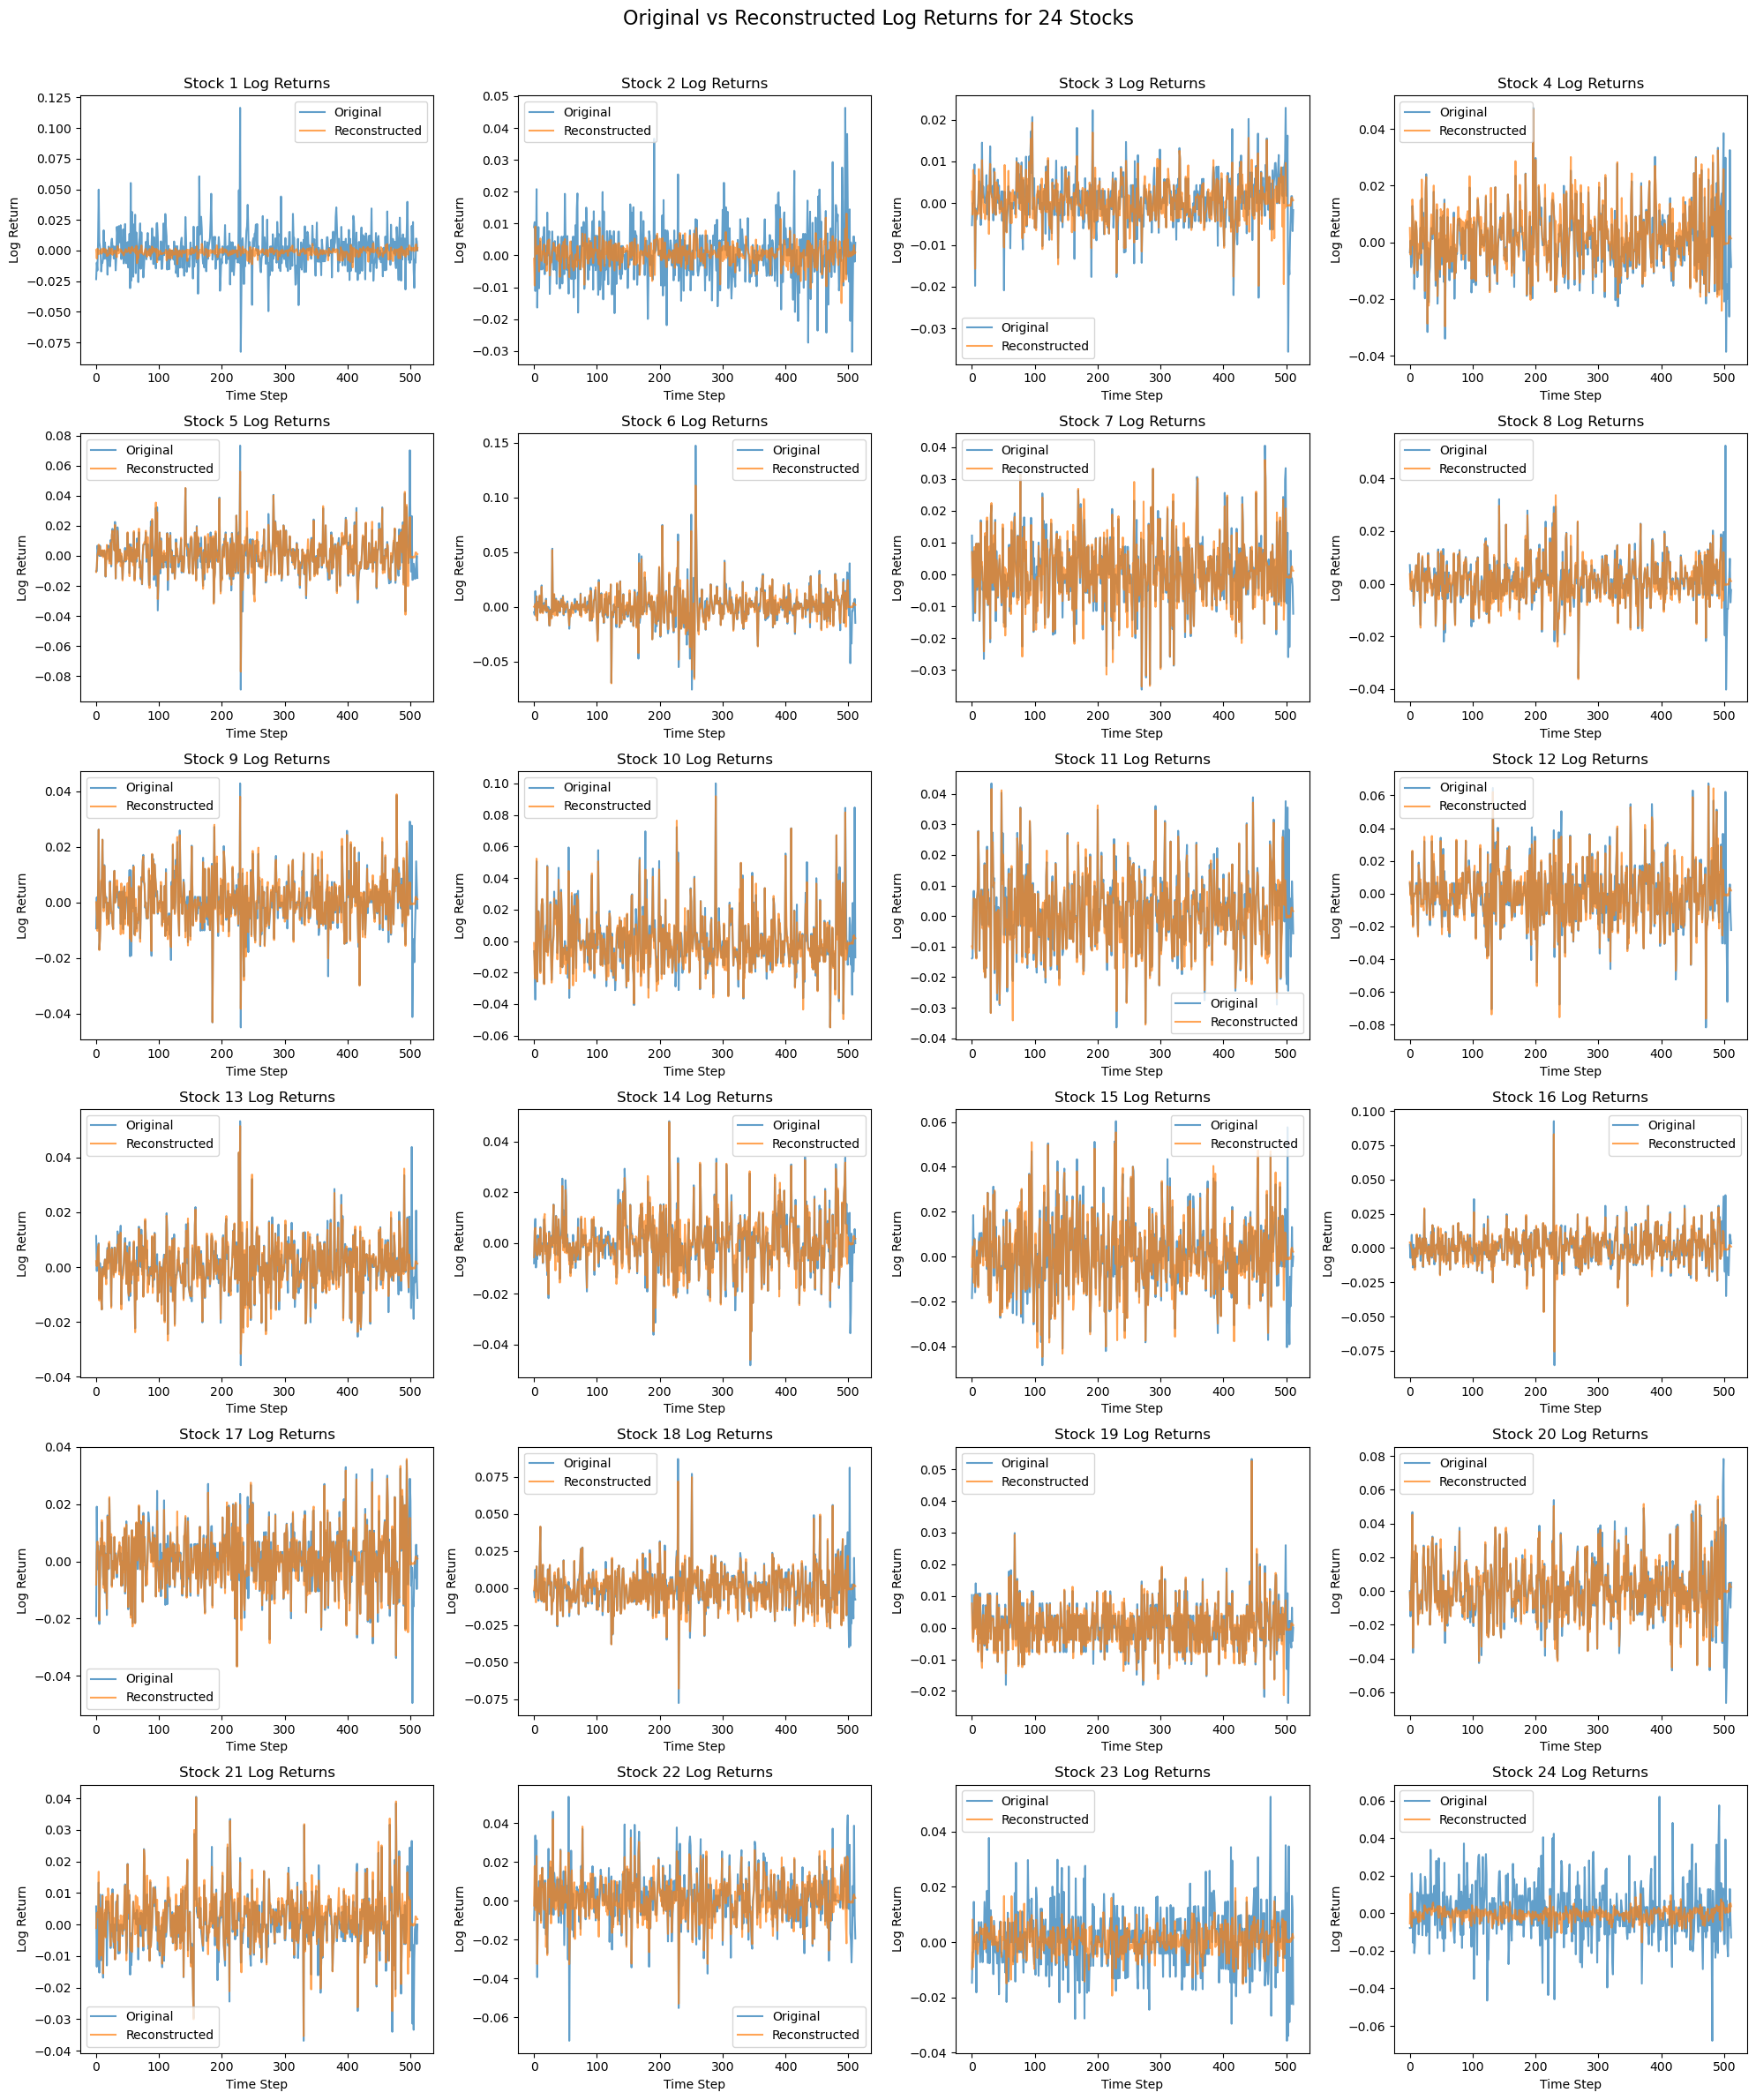

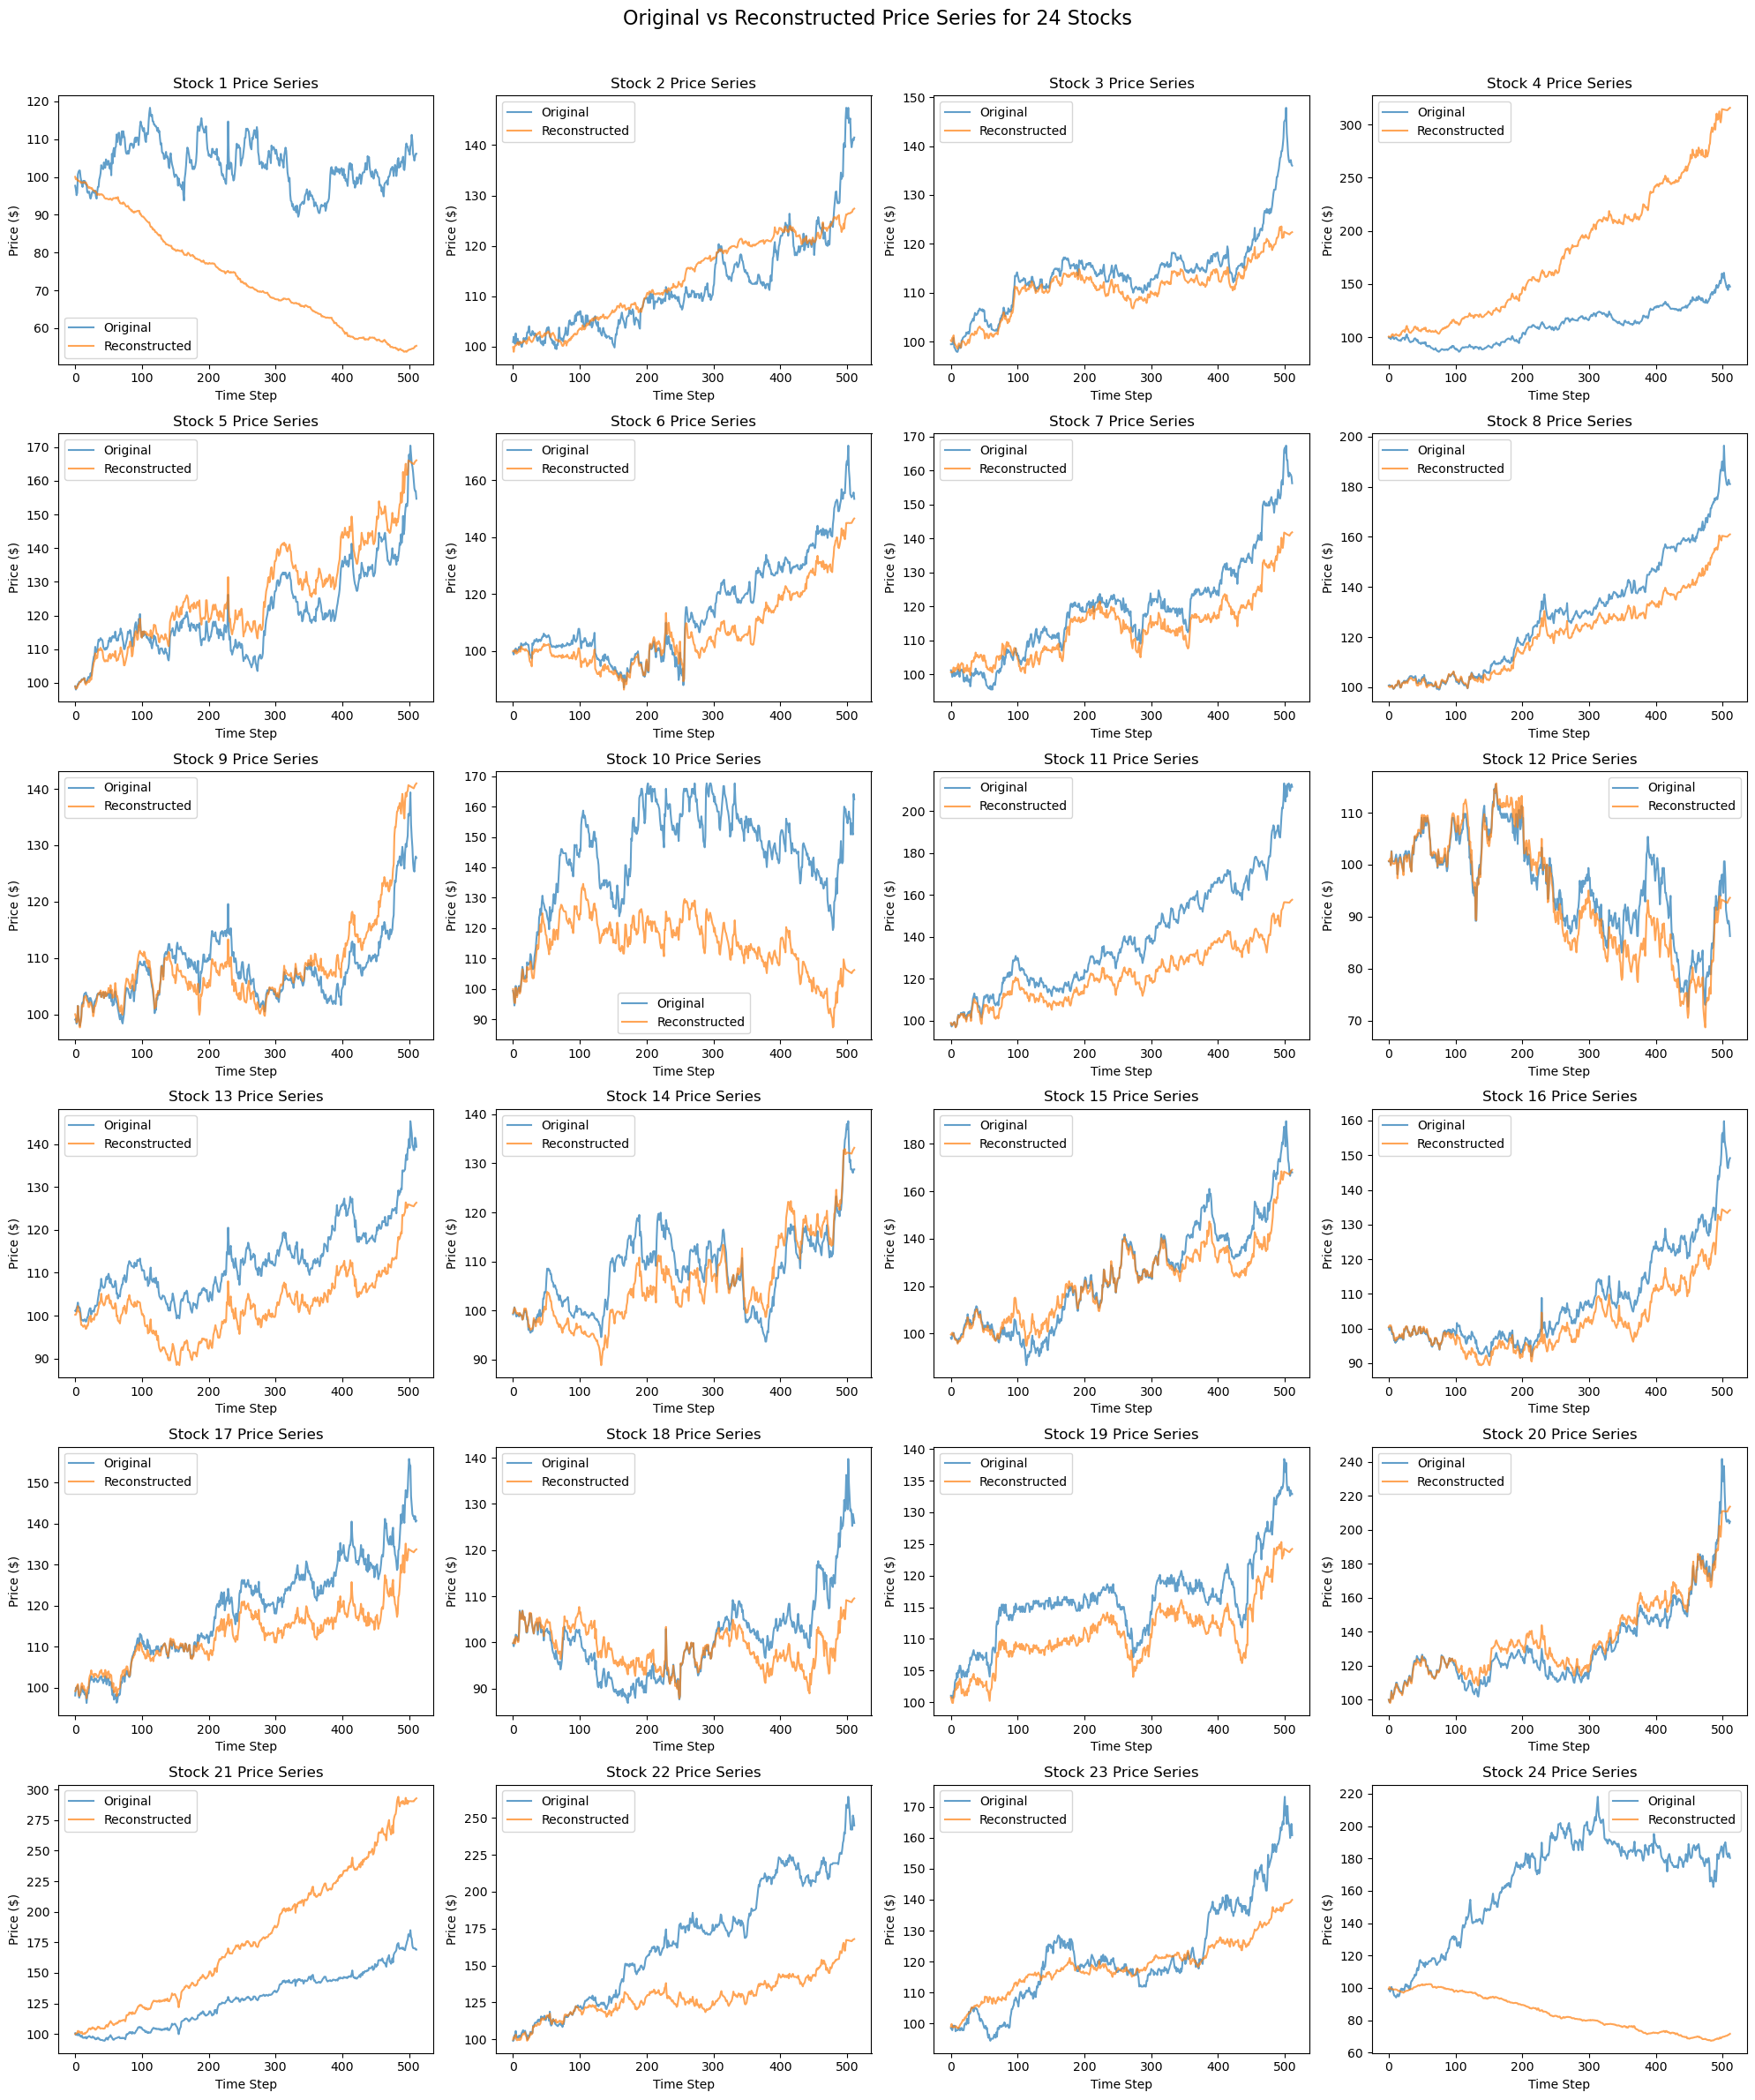

In [13]:


# --- Example Reconstruction and Plotting ---
with torch.no_grad():
    # Select one sample from the test_loader
    sample_input, _ = next(iter(test_loader))
    sample_input = sample_input[0].unsqueeze(0)  # (1, 1, 512, 24)
    reconstructed_output = model(sample_input).squeeze().numpy()  # (512, 24)
    original_input = sample_input.squeeze().numpy()              # (512, 24)

    # Inverse transform to original scale (reshape to 2D for inverse_transform)
    reconstructed_original_scale = scaler.inverse_transform(reconstructed_output.reshape(1, -1)).reshape(input_height, input_width)
    original_original_scale = scaler.inverse_transform(original_input.reshape(1, -1)).reshape(input_height, input_width)

    # Define stock names for plotting
    stock_ids = [f'Stock {i+1}' for i in range(num_features)]

    # Plot Original vs Reconstructed Log Returns
    fig1, axes1 = plt.subplots(6, 4, figsize=(20, 25))
    axes1 = axes1.flatten()
    for i in range(num_features):
        ax = axes1[i]
        ax.plot(original_original_scale[:, i], label='Original', alpha=0.7)
        ax.plot(reconstructed_original_scale[:, i], label='Reconstructed', alpha=0.7)
        ax.set_title(f'{stock_ids[i]} Log Returns')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Log Return')
        ax.legend()
    # Hide any unused subplots
    for i in range(num_features, len(axes1)):
        fig1.delaxes(axes1[i])
    fig1.suptitle('Original vs Reconstructed Log Returns for 24 Stocks', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

    # Calculate Price Series from Log Returns
    initial_price = 100
    # Price_t = Price_{t-1} * exp(log_return_t)
    original_prices = initial_price * np.exp(np.cumsum(original_original_scale, axis=0))
    reconstructed_prices = initial_price * np.exp(np.cumsum(reconstructed_original_scale, axis=0))

    # Plot Original vs Reconstructed Prices
    fig2, axes2 = plt.subplots(6, 4, figsize=(20, 25))
    axes2 = axes2.flatten()
    for i in range(num_features):
        ax = axes2[i]
        ax.plot(original_prices[:, i], label='Original', alpha=0.7)
        ax.plot(reconstructed_prices[:, i], label='Reconstructed', alpha=0.7)
        ax.set_title(f'{stock_ids[i]} Price Series')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Price ($)')
        ax.legend()
    # Hide any unused subplots
    for i in range(num_features, len(axes2)):
        fig2.delaxes(axes2[i])
    fig2.suptitle('Original vs Reconstructed Price Series for 24 Stocks', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

In [139]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import torch

# ----------------------
# Existing Code Context
# ----------------------

# ----------------------

# Parameters for segmentation
num_segments = 24
segment_length = 512

# Ensure that the total data length is sufficient
total_required_length = num_segments * segment_length
if len(original) < total_required_length:
    raise ValueError(f"Original log returns length ({len(original)}) is less than required {total_required_length}.")

# Initialize lists to hold price series
price_segments_original = []
price_segments_recon = []

# Reconstruct price series for each segment
for i in range(num_segments):
    start_idx = i * segment_length
    end_idx = start_idx + segment_length
    # Extract log returns for the current segment
    log_returns_original = original[start_idx:end_idx]
    log_returns_recon = reconstructed[start_idx:end_idx]
    
    # Reconstruct price series from log returns
    # P_t = P_{t-1} * exp(r_t)
    # Starting price is 100
    prices_original = 100 * np.exp(np.cumsum(log_returns_original))
    prices_recon = 100 * np.exp(np.cumsum(log_returns_recon))
    
    # Prepend the starting price
    prices_original = np.insert(prices_original, 0, 100)
    prices_recon = np.insert(prices_recon, 0, 100)
    
    price_segments_original.append(prices_original)
    price_segments_recon.append(prices_recon)

# Create subplots: 6 rows x 4 columns
fig = make_subplots(rows=6, cols=4,
                    subplot_titles=[f"Segment {i+1}" for i in range(num_segments)],
                    shared_xaxes=True, shared_yaxes=True)

# Add each price segment to the subplots
for i in range(num_segments):
    row = (i // 4) + 1
    col = (i % 4) + 1
    
    # Days axis for the current segment
    days = list(range(segment_length + 1))  # +1 because of the starting price
    
    # Add Original Price Trace
    fig.add_trace(
        go.Scatter(
            x=days,
            y=price_segments_original[i],
            mode='lines',
            name='Original',
            line=dict(color='blue'),
            showlegend=(i == 0)  # Show legend only once
        ),
        row=row,
        col=col
    )
    
    # Add Reconstructed Price Trace
    fig.add_trace(
        go.Scatter(
            x=days,
            y=price_segments_recon[i],
            mode='lines',
            name='Reconstructed',
            line=dict(color='red', dash='dash'),
            showlegend=(i == 0)  # Show legend only once
        ),
        row=row,
        col=col
    )

# Update layout for better visualization
fig.update_layout(
    height=1800,  # Adjust height as needed
    width=1500,   # Adjust width as needed
    title_text='Reconstructed Price Curves from Log Returns',
    template='plotly_white'
)

# Add a single legend
fig.for_each_trace(lambda t: t.update(showlegend=False) if t.name != 'Original' and t.name != 'Reconstructed' else t)
fig.update_layout(
    legend=dict(
        title="Price Curves",
        x=0.85,
        y=0.95,
        bgcolor='rgba(255,255,255,0)',
        bordercolor='rgba(255,255,255,0)'
    )
)

# Display the plot
fig.show()

# the prompt:
I want to make a sparse autoencoder plus NEAT model to develop my finance models. Now I finished the sparse autoencoder part as below:

```
import numpy as np
import pandas as pd

# parameters
historical_days = 512  
# assume log_returns_df is your DataFrame and stock_ids is the list of stock columns

# 1. Extract the data as a NumPy array (shape: (n_days, n_stocks))
data = log_returns_df[stock_ids].values
n_days, n_stocks = data.shape

# 2. Use sliding_window_view along axis=0.
#    The output shape is (n_days - historical_days, n_stocks, historical_days)
windows = np.lib.stride_tricks.sliding_window_view(data, window_shape=historical_days, axis=0)

# 3. Select windows corresponding to i = historical_days to n_days - 1.
#    The original loop uses for i in range(historical_days, n_days) and for each i,
#    the window to collect is: [ log_returns_df.iloc[i],
#                                log_returns_df.iloc[i-1],
#                                …,
#                                log_returns_df.iloc[i-historical_days+1] ]
#    With the output shape above, the proper index is windows[1:], which has shape (n_days - historical_days, n_stocks, historical_days)

selected_windows = windows[0:]

# 4. Reverse along the last axis to have the most recent data first.
#    That is, for each sliding window, reverse the chronological order.
selected_windows = selected_windows[..., ::-1]  # now each window's last axis is reversed

# 5. For each row, flatten the data so that the data ordering is:
#    For each stock in stock_ids: [most_recent, next, ..., oldest] 
#    This order is naturally obtained by flattening each (n_stocks, historical_days) window in C order.
wider_array = selected_windows.reshape(selected_windows.shape[0], -1)

# 6. Create the column names. For each stock, we create names in the order "{stock_id}_j"
#    where j=0 is the most recent day, followed by older days.
column_names = []
for stock_id in stock_ids:
    for j in range(historical_days):
        column_names.append(f"{stock_id}_{j}")

# 7. Build and display the new, wider DataFrame.
wider_df = pd.DataFrame(wider_array, columns=column_names)


# first 2520 rows for autoencoder
wider_df_for_autoencoder = wider_df.iloc[:2520]

# now with wider_df_for_autoencoder, we split the rows into training and testing sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(wider_df_for_autoencoder, test_size=0.2, random_state=42)

class SparseConvAutoencoder(nn.Module):
    def __init__(self, input_length, sparsity_param=0.05, beta=1e-3):
        super(SparseConvAutoencoder, self).__init__()
        self.sparsity_param = sparsity_param
        self.beta = beta

        # Encoder with reduced channels and smaller kernel size
        self.encoder = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=8, kernel_size=2, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(in_channels=8, out_channels=16, kernel_size=2, stride=2, padding=1),
            nn.ReLU()
        )

        # Decoder with reduced channels and smaller kernel size
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(in_channels=16, out_channels=8, kernel_size=2, stride=2, padding=1, output_padding=1),
            nn.LeakyReLU(0.01),
            nn.ConvTranspose1d(in_channels=8, out_channels=1, kernel_size=2, stride=2, padding=1, output_padding=0),
            nn.Identity()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def sparsity_loss(self, hidden):
        rho_hat = torch.mean(hidden, dim=(0, 2))
        rho = torch.full_like(rho_hat, self.sparsity_param)
        kl_divergence = rho * torch.log(rho / (rho_hat + 1e-10)) + \
                        (1 - rho) * torch.log((1 - rho) / (1 - rho_hat + 1e-10))
        return self.beta * torch.sum(kl_divergence)

```


now make NEAT using the rest of the entire wider_df data, the input of NEAT is the encode result of the autoencoder, the output of NEAT is the portofolio with length of stock_ids. the portfolio can be negative, which means do short. the summary of portfolio must be equal to 1.

wider_df is the log return, the shape is (n_days - historical_days, n_stocks * window_size)

the creatures start with 100 energy unit and each step (day) they consume 0.1 energy. they earn energy from the stock market with the portfolio they created. they need to pay 0.001 commision when they buy or sell stocks.

the top 30% creature can reproduce, use mutation and cross-over. and the max population is 1000.

Autoencoder is already trained, it stores in the variable 'model', you can use it.

In [64]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Ensure the autoencoder is in evaluation mode
model.eval()

# Prepare the data for encoding
# Convert the DataFrame to a PyTorch tensor and reshape for Conv1d
input_data = torch.tensor(wider_df.values, dtype=torch.float32).unsqueeze(1)  # Shape: (n_samples, 1, n_features)

# Create a DataLoader for batch processing
batch_size = 64
loader = DataLoader(input_data, batch_size=batch_size, shuffle=False)

# Encode the data using the trained autoencoder
encoded_features = []
with torch.no_grad():
    for batch in loader:
        encoded = model.encoder(batch)
        encoded = encoded.view(encoded.size(0), -1)  # Flatten the encoded output
        encoded_features.append(encoded)

# Concatenate all encoded batches
encoded_features = torch.cat(encoded_features, dim=0).numpy()  # Shape: (n_samples, encoded_length)

# Convert to DataFrame for easier handling
encoded_df = pd.DataFrame(encoded_features)

In [65]:
encoded_df

,0,1,2,3,4,5,6,7,8,9,...,51206,51207,51208,51209,51210,51211,51212,51213,51214,51215
0,0.066906,0.194536,0.192944,0.194035,0.195907,0.193536,0.196618,0.195622,0.196259,0.196353,...,0.120765,0.131753,0.130684,0.130051,0.138078,0.137646,0.142888,0.132853,0.131687,0.139795
1,0.066367,0.198136,0.193826,0.195541,0.189829,0.198107,0.194361,0.194154,0.194364,0.191828,...,0.125052,0.130856,0.129320,0.129378,0.131780,0.133884,0.139354,0.125967,0.128205,0.130562
2,0.066926,0.196703,0.191479,0.195567,0.195086,0.193212,0.197734,0.196515,0.196114,0.196252,...,0.136794,0.135519,0.136139,0.133960,0.130331,0.128893,0.128618,0.124484,0.135739,0.127207
3,0.064437,0.197215,0.195518,0.194012,0.196418,0.190893,0.195972,0.194260,0.197130,0.190165,...,0.138303,0.129667,0.136058,0.136334,0.131774,0.137168,0.133067,0.131695,0.141936,0.132520
4,0.066094,0.197093,0.194536,0.192944,0.194035,0.195907,0.193536,0.196618,0.195622,0.196259,...,0.132078,0.120765,0.131753,0.130684,0.130051,0.138078,0.137646,0.142888,0.132853,0.131215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,0.064237,0.194249,0.198768,0.193087,0.190010,0.193023,0.194429,0.193722,0.196868,0.194585,...,0.129455,0.142183,0.143729,0.128253,0.138432,0.130058,0.133772,0.135132,0.145976,0.130437
15546,0.059067,0.195078,0.197376,0.193965,0.194120,0.194396,0.194550,0.191007,0.197350,0.195573,...,0.129579,0.140720,0.135575,0.127742,0.139809,0.132795,0.134920,0.135825,0.130793,0.129308
15547,0.063248,0.192847,0.196495,0.193764,0.192831,0.191820,0.193552,0.195133,0.193877,0.194327,...,0.133768,0.134652,0.124132,0.133297,0.132734,0.137514,0.126946,0.128693,0.119492,0.130210
15548,0.065073,0.184404,0.195634,0.199113,0.194567,0.194481,0.193442,0.193170,0.193552,0.195283,...,0.139669,0.131753,0.129085,0.142364,0.127082,0.136679,0.126691,0.124494,0.125512,0.140763
